필요한 파일들을 다운로드합니다.

In [1]:
!gdown https://drive.google.com/uc?id=1k3PoJSjKF6Nxxr0zlQvxHgUNrsUT4fk4 #pos_train.txt
!gdown https://drive.google.com/uc?id=16CEZaio24XfD86MZ5AsGpgePqT2hyb4P #neg_train.txt

Downloading...
From: https://drive.google.com/uc?id=1k3PoJSjKF6Nxxr0zlQvxHgUNrsUT4fk4
To: /content/pos_train.txt
100% 3.96M/3.96M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=16CEZaio24XfD86MZ5AsGpgePqT2hyb4P
To: /content/neg_train.txt
100% 3.63M/3.63M [00:00<00:00, 147MB/s]


In [3]:
#가상환경 구성 및 필요한 라이브러리 설치
# conda create -n LM
# conda install pip
# pip install pickle
# conda install gensim 
# conda install nltk
# conda install -c anaconda scikit-learn
# conda install pytorch==1.0.0 torchvision==0.2.1 cuda100 -c pytorch
# conda install matplotlib
# conda install pandas

SyntaxError: ignored

In [4]:
import os
import random
import numpy as np
from gensim.models import word2vec #  word2vec 관련 모델을 제공해주는 library  
from sklearn.manifold import TSNE # 시각화를 위한 TSNE 사용 
import matplotlib.pyplot as plt
import torch.nn as nn # pytorch neural network 불러오기 
import torch

import pickle

#os.environ["CUDA_VISIBLE_DEVICES"]="4"

# Word embedding (word2vec)
- word embedding 이 어떻게 동작하게 되는지 알아봅시다.



![대체 텍스트](https://drive.google.com/uc?id=1sSjjs8fTFblGedtPVbfHYhbQvAyk8u3g)

In [5]:
# preparing data
sentences = []
pos_data = open("./pos_train.txt").readlines()
neg_data = open("./neg_train.txt").readlines()
data_ = pos_data + neg_data
for line in data_:
    sentences.append(line.strip().split(' '))

In [6]:
# 파라메터값 지정
num_features = 300 # 임베딩 벡터 사이즈
negative = 10 # negative sampling할 단어 수
min_word_count = 10 # 단어빈도수가 10으로 제한               # 이건 머임??
window = 5 # context window 사이즈                     # 이게 머임????
downsampling = 0.75 # 단어의 빈도수가 높은 단어에 대해 빈도수를 낮춤 # 이건 왜있음??
epoch = 5 # epoch 수

In [8]:
# skip-gram 모델 학습
skip_gram = word2vec.Word2Vec(sentences,
                              sg = 1, # skip-gram
                              negative=negative,
                              size=num_features, 
                              min_count=min_word_count,
                              window=window,
                              sample=downsampling,
                              iter=epoch)

##  Training result

In [9]:
skip_gram['king']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.13864906e-01,  5.73365502e-02, -1.35067001e-01, -1.31255716e-01,
       -9.82545391e-02, -3.21550923e-03,  1.26211345e-01, -8.18664208e-02,
       -5.68438880e-02,  1.60955992e-02,  3.93633097e-02,  1.07866712e-01,
        1.03151789e-02, -2.23006576e-01,  1.18166246e-01, -3.84507291e-02,
       -1.69028103e-01, -3.50845039e-01, -5.48868254e-02,  8.09386820e-02,
       -5.19459285e-02,  1.42502204e-01,  3.08526307e-02, -7.88336471e-02,
       -6.60632178e-02,  5.34717739e-02,  1.05241142e-01,  1.17419675e-01,
       -4.07103710e-02, -1.82423573e-02, -1.27473399e-01,  1.59447698e-03,
        1.46703705e-01,  4.26622629e-02,  1.60522133e-01, -1.92736331e-02,
       -7.54785091e-02, -2.92592496e-01, -1.39443368e-01,  2.46050179e-01,
       -2.08110213e-02, -4.71927524e-02, -1.03894994e-01, -4.47171889e-02,
        1.12827390e-01, -6.22687750e-02,  4.95810136e-02, -1.28417969e-01,
        1.44523144e-01, -4.59813289e-02,  3.02906156e-01, -1.84810404e-02,
       -2.02877268e-01,  

In [10]:
skip_gram.wv.most_similar("man") # skip-gram 모델을 이용하여 'man'에 가장 유사한 단어 추출

[('woman', 0.7343392968177795),
 ('boy', 0.7195867300033569),
 ('girl', 0.6912941932678223),
 ('doctor', 0.6854040622711182),
 ('teenager', 0.6789478063583374),
 ('person', 0.6684319972991943),
 ('lady', 0.6646407842636108),
 ('guy', 0.662726879119873),
 ('kid', 0.6584751605987549),
 ('skinhead', 0.6474562883377075)]

In [11]:
vector = skip_gram["king"] - skip_gram["man"] + skip_gram["woman"]
skip_gram.wv.similar_by_vector(vector, topn=10, restrict_vocab=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('king', 0.74737548828125),
 ('jessica', 0.6230763792991638),
 ('colleague', 0.6206656694412231),
 ('hall', 0.6193362474441528),
 ('reed', 0.6150694489479065),
 ('queen', 0.6123046875),
 ('kingpin', 0.6113097667694092),
 ('fisher', 0.6080318689346313),
 ('jamie', 0.6064345836639404),
 ('leia', 0.6059460639953613)]

In [12]:
# pretrained model 다운로드 및 로드
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [13]:
pretrained_w2v = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [14]:
vector = pretrained_w2v["queen"] - pretrained_w2v["female"] + pretrained_w2v["male"]
pretrained_w2v.wv.similar_by_vector(vector, topn=10, restrict_vocab=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('queen', 0.947972297668457),
 ('princess', 0.7650102376937866),
 ('king', 0.7501826286315918),
 ('royal', 0.6887385845184326),
 ('elizabeth', 0.6868605613708496),
 ('throne', 0.6770995855331421),
 ('crown', 0.6766407489776611),
 ('prince', 0.6665029525756836),
 ('consort', 0.6578314304351807),
 ('monarch', 0.6456246376037598)]

In [15]:
vector = pretrained_w2v['korea'] - pretrained_w2v['seoul'] + pretrained_w2v['tokyo']
pretrained_w2v.wv.similar_by_vector(vector, topn=10, restrict_vocab=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('japan', 0.911020040512085),
 ('korea', 0.8252936005592346),
 ('tokyo', 0.796038031578064),
 ('japanese', 0.7281501889228821),
 ('china', 0.6805654764175415),
 ('asia', 0.656752347946167),
 ('korean', 0.6231093406677246),
 ('europe', 0.6118385195732117),
 ('russia', 0.6116989254951477),
 ('pyongyang', 0.6081833839416504)]

In [16]:
def render_TSNE(vocab, word_emb):
    """
    TSNE를 이용한 word2vec 시각화 
    args:
        vocab    - vocab list
        word_emb - word embeddings
    """
    tsne = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32) #TSNE 시각화를 위한 initialization
    _tsne = tsne.fit_transform(word_emb) # TSNE 시각화 적용
    x_coordinate = _tsne[:,0] # x 좌표
    y_coordinate = _tsne[:,1] # y 좌표

    # scatter plot initialization
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)
    ax.scatter(x_coordinate, y_coordinate)

    for i, word in enumerate(random_vocab):
        ax.annotate(word,(x_coordinate[i], y_coordinate[i]), fontsize=30) # 각 scatter들에대해 단어 labeling

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


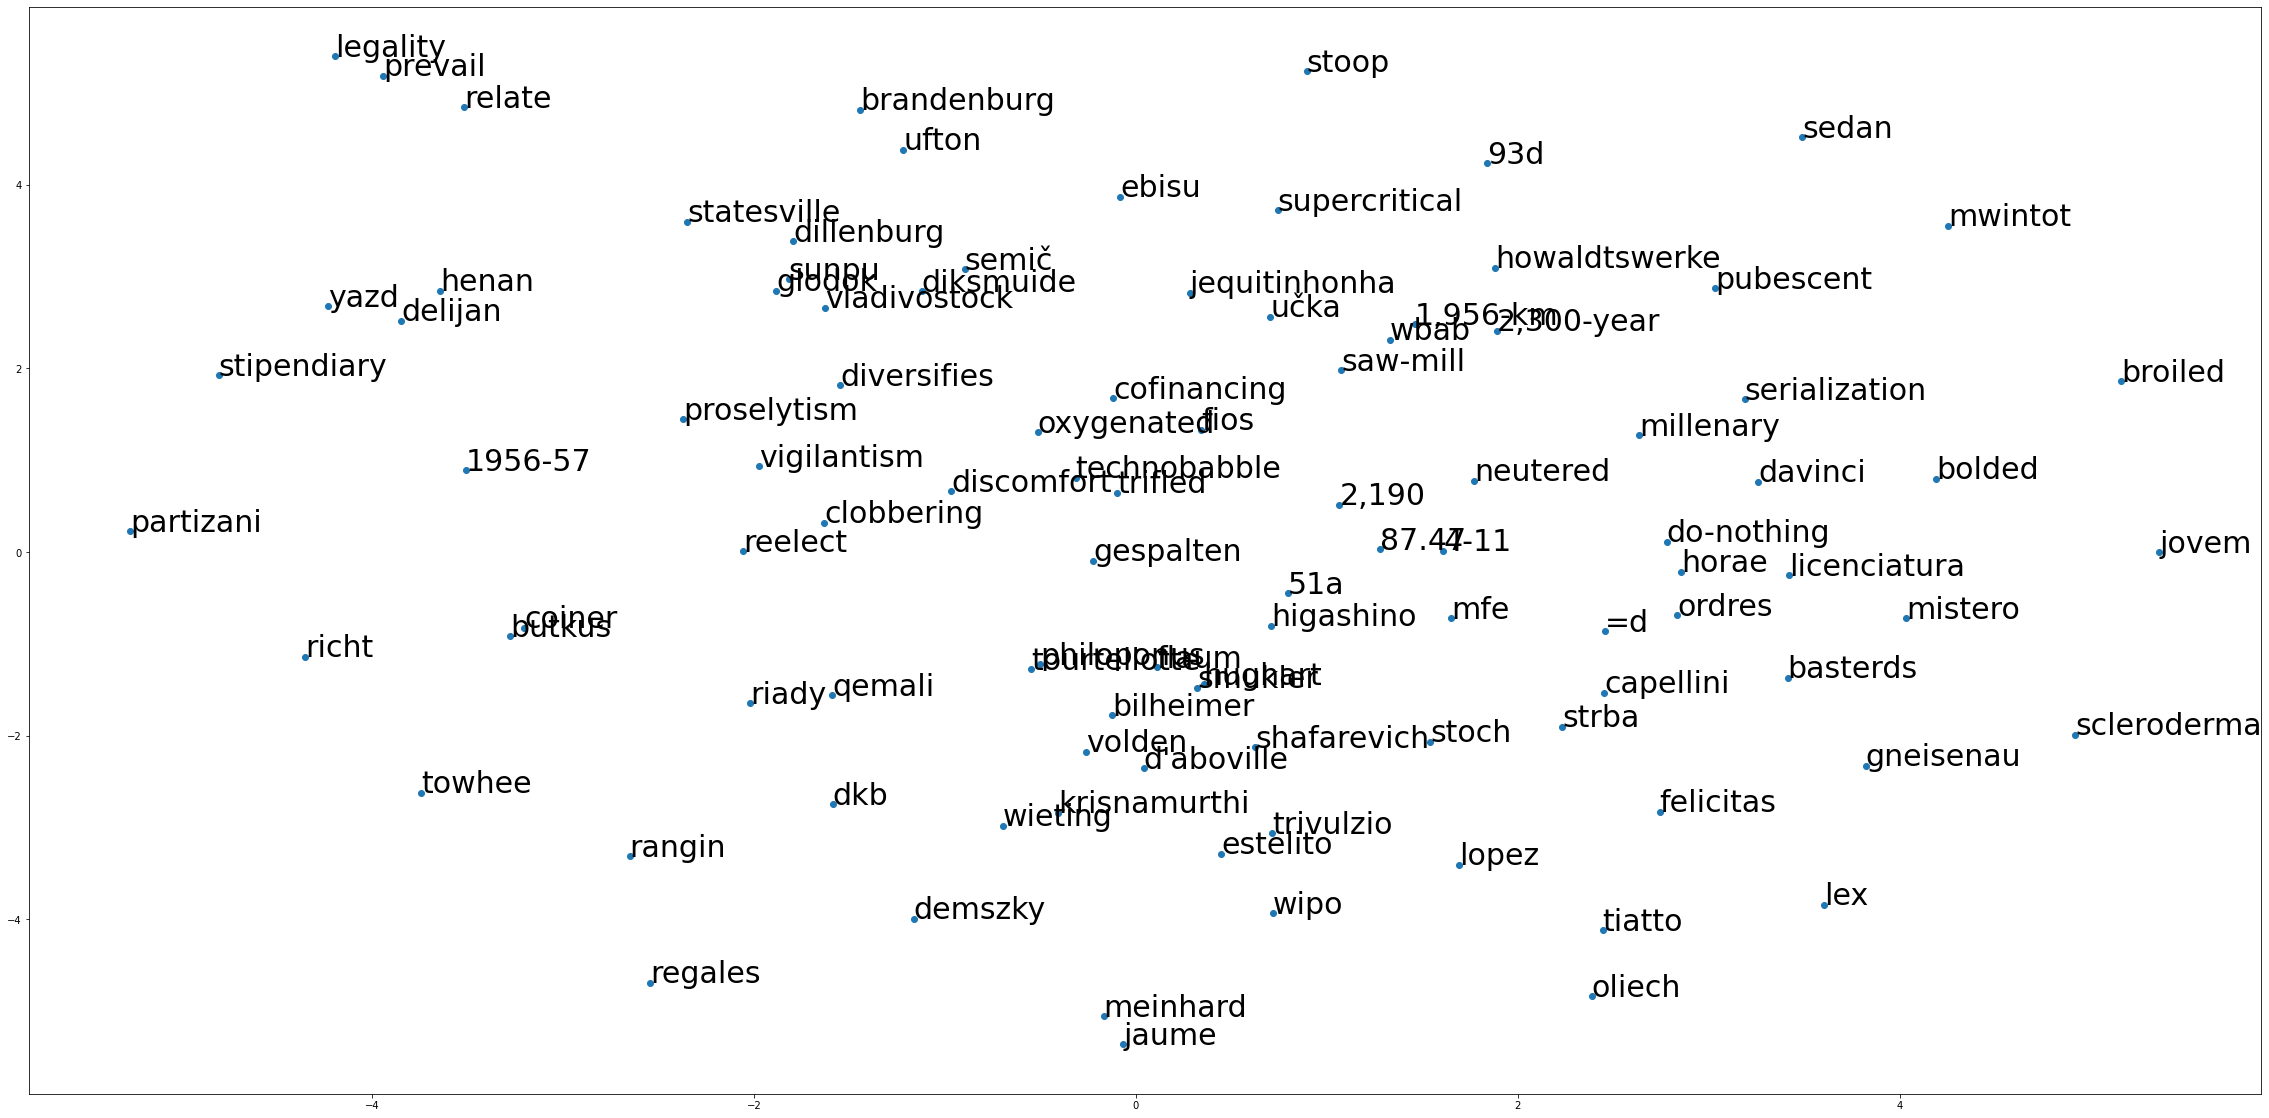

In [17]:
# Skip-gram 시각화(TSNE)
vocab = list(pretrained_w2v.wv.vocab) # vocab list 불러오기
random_vocab = random.sample(vocab,k=100) #100개의 임의 단어를 랜덤 샘플링
# random_vocab = ['queen','king','male','female','man','woman','girl','boy']
word_emb = pretrained_w2v[random_vocab] # 샘플링된 단어에 대해 학습된 임베딩 벡터 불러오기
render_TSNE(random_vocab, word_emb) # TSNE 시각화

# PyTorch를 이용한 word embedding
지금까지는 gensim 라이브러리를 이용한 word2vec 적용 방법을 배워보았습니다.

이번에는 딥러닝 모델 학습에 많이 이용되는 PyTorch 라이브러리를 통한 학습을 진행해보겠습니다.
- 실제 word embedding은 2단계로 이루어져있습니다.
  1. 단어를 단어의 one-hot vector 혹은 vocabulary index로 변환
  2. one-hot vector 혹은 index로 표현된 단어를 단어의 의미가 담긴 vector로 변환

- 1단계는 dataset 전처리 단계에서 진행합니다.
- 2단계는 model을 구성할 때 진행합니다. 


gensim의 pretrained word2vec 모델을 pytorch에서 불러와보도록 하겠습니다.

In [18]:
# pretrained vocabulary 확인
pretrained_w2v.vocab

{'the': <gensim.models.keyedvectors.Vocab at 0x7f34bf797310>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7f34bfa24f90>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7f34bf797a90>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f34bfa24550>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f34bf797c10>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f34bfa24990>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f34bf797990>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f34bf7a0fd0>,
 '"': <gensim.models.keyedvectors.Vocab at 0x7f34bf797650>,
 "'s": <gensim.models.keyedvectors.Vocab at 0x7f34bf7a0590>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f34bf797a10>,
 '-': <gensim.models.keyedvectors.Vocab at 0x7f34bf7a0f10>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f34bf797150>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f34bf7a0a10>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f34bf7974d0>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7f34bf7a0e90>,
 'said': <gensim.models

In [19]:
# vocabulary 구성
word2idx = {word:idx for idx, word in enumerate(pretrained_w2v.vocab.keys())}
idx2word = {idx:word for word, idx in word2idx.items()}

In [20]:
# nn.Embedding 레이어를 이용한 word2vec 레이어 생성
# https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

embedding_layer = nn.Embedding(num_embeddings = len(word2idx),
                               embedding_dim= pretrained_w2v.vector_size)

In [21]:
embedding_layer # 40만개의 단어가 100 dimension vector로 표현되어 있습니다

Embedding(400000, 100)

In [22]:
embedding_layer.weight

Parameter containing:
tensor([[ 1.3481, -0.9084,  1.5102,  ..., -1.1379, -0.1512,  0.5172],
        [-1.5093,  1.2328, -0.0800,  ..., -2.1670,  2.1746,  0.5573],
        [-1.3999, -1.0503, -0.9178,  ..., -0.3966, -0.0680,  0.4969],
        ...,
        [ 0.7534,  0.8503,  0.1321,  ..., -1.3362, -1.1231,  0.6479],
        [ 0.4401, -0.5044, -1.3568,  ..., -0.4067, -0.0694,  0.1169],
        [ 0.2744, -0.2932, -0.0822,  ..., -0.1687,  0.4306,  0.7945]],
       requires_grad=True)

In [23]:
# embedding_layer의 weight를 pretrained word2vec의 weight로 업데이트해줍니다.
embedding_layer.weight = nn.Parameter(torch.tensor(pretrained_w2v.wv.vectors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [24]:
embedding_layer.weight

Parameter containing:
tensor([[-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        [-0.1077,  0.1105,  0.5981,  ..., -0.8316,  0.4529,  0.0826],
        [-0.3398,  0.2094,  0.4635,  ..., -0.2339,  0.4730, -0.0288],
        ...,
        [ 0.3609, -0.1692, -0.3270,  ...,  0.2714, -0.2919,  0.1611],
        [-0.1046, -0.5047, -0.4933,  ...,  0.4253, -0.5125, -0.1705],
        [ 0.2837, -0.6263, -0.4435,  ...,  0.4368, -0.8261, -0.1570]],
       requires_grad=True)

In [25]:
print("Word:",idx2word[0])
embedding_layer.weight[0] # 0번째 단어의 embedding vector

Word: the


tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459,  0.8278,  0.27

In [26]:
# 실제 text를 embedding vector들로 변환해봅시다.
text = "The word embedding layer is nice ."
tokens = text.lower().split(' ')
tokens

['the', 'word', 'embedding', 'layer', 'is', 'nice', '.']

In [27]:
token_idx = [word2idx[word] for word in tokens]
token_idx

[0, 1388, 43338, 6828, 14, 3082, 2]

In [28]:
token_idx = torch.tensor(token_idx, dtype=torch.long) # Pytorch 연산이 가능한 형태로 변환해줍니다.
token_idx

tensor([    0,  1388, 43338,  6828,    14,  3082,     2])

In [29]:
embedding_layer(token_idx).shape # embedding 모델에 입력한 결과, 7개 단어에 대한 100 dimension vector들이 생성되었습니다.

torch.Size([7, 100])

In [30]:
# gensim을 통해 생성한 결과와 pytorch를 통해 생성한 결과값이 같은 것을 확인함으로써, pretrained weight가 잘 로드 되었음을 확인할 수 있습니다.
(embedding_layer(token_idx).detach().numpy() == pretrained_w2v[tokens]).all() 

True